In [1]:
import matplotlib.pyplot as plt
import torch as th
import numpy as np
from tqdm import tqdm
from PoisDenoiser.VST import *

%load_ext autoreload
%autoreload 2

In [2]:
lams = np.linspace(0.1, 5, 1000)
alg_ests, unbiased_ests, unbiased_exact_ests = [], [], []
arrs = [alg_ests, unbiased_ests, unbiased_exact_ests]
backward_algs = [VST_backward_alg, VST_backward_unbiased, VST_backward_unbiased_exact]
algs_names = ['algebraic', 'unbiased', 'exact unbiased']

for lam in tqdm(lams):
    pois = th.distributions.Poisson(lam)

    x = pois.sample((100000,))
    y = VST_forward(x)
    y_aver = y.sum()/y.numel()
    for VST_backward, arr in zip(backward_algs, arrs):
        lam_est = float(VST_backward(y_aver))
        arr.append(lam_est - lam)
        

100%|██████████| 1000/1000 [00:10<00:00, 90.93it/s]


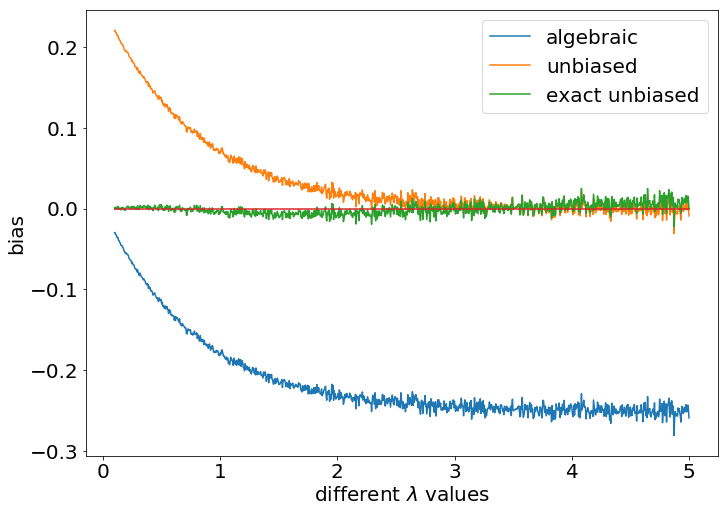

In [4]:
fontsize = 20
fig, ax = plt.subplots(1,figsize=(10,7), constrained_layout=True)
fig.patch.set_facecolor('white')
for arr, name in zip(arrs, algs_names):
    ax.plot(lams, arr, label=name)


ax.plot(lams, np.zeros_like(lams))
ax.legend(fontsize=20);

ax.set_xlabel(r'different $\lambda$ values', fontsize=fontsize)
ax.set_ylabel('bias', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);
ax.tick_params(axis='both', labelsize=fontsize)
#################

# ax.plot(l2_w[indices_sorted], label='GausProx w/ param', linewidth=5.0, alpha=0.7)
# ax.plot(pois_w[indices_sorted], label='PoisProx w/ param', linewidth=5.0, alpha=0.7)


